# Loading/Cleaning Datasets

## School Dataset

Some links: https://data.cityofnewyork.us/Education/2006-2009-Historical-Daily-Attendance-By-School/xwxx-rnki

https://data.cityofnewyork.us/Education/2010-2016-School-Safety-Report/qybk-bjjc

In [1]:
import pandas as pd
from sodapy import Socrata


client = Socrata("data.cityofnewyork.us", None)

'''
Takes long time to run
# Define a list of the URLs for the attendance datasets
attendance_urls = [
    "xwxx-rnki",
    "wpqj-3buw",
    "pffu-gbfi",
    "46g3-savk",
    "xc44-2jrh"
]

# Create a list comprehension to read each CSV file into a data frame and store it in a list
dfs = [pd.DataFrame.from_records(client.get_all(url)) for url in attendance_urls]

# Concatenate all the data frames in the dfs list into a single data frame
attendance_df = pd.concat(dfs)

attendance_df.to_csv('Merged_Attendance.csv')
'''

results = client.get_all("qybk-bjjc")

schools_df = pd.DataFrame.from_records(results,columns=['longitude','latitude','dbn'])
schools_df.drop_duplicates(inplace=True)
schools_df['latitude']=schools_df['latitude'].astype(float)
schools_df['longitude']=schools_df['longitude'].astype(float)


attendance_df=pd.read_csv('Merged_Attendance.csv', dtype={'school': str,'date': str},index_col=0)
attendance_df.drop_duplicates(inplace=True)


# drop duplicate rows
attendance_df.drop_duplicates(inplace=True)

num_nan = attendance_df['school'].isnull().sum()
print(f"There are {num_nan} NaN values in column 'school'.")

# drop rows with NaN values in column 'school'
attendance_df.dropna(subset=['school'],inplace=True)


school_df = pd.merge(attendance_df, schools_df, left_on='school', right_on='dbn', how='left')
del school_df['dbn']

# Print the number of rows not found
print(f"{school_df['latitude'].isnull().sum()} rows were not found in the schools dataset.")
school_df.dropna(subset=['latitude'],inplace=True)

# Prints the first columns and few rows of the dataframe
print(len(school_df))
school_df.head()



There are 727707 NaN values in column 'school'.
84491 rows were not found in the schools dataset.
2992352


,school,date,schoolyear,enrolled,present,absent,released,longitude,latitude
0,01M015,20060905,20062007,252.0,226.0,26.0,0.0,-73.979022,40.721807
1,01M015,20060906,20062007,248.0,227.0,21.0,0.0,-73.979022,40.721807
2,01M015,20060907,20062007,245.0,228.0,17.0,0.0,-73.979022,40.721807
3,01M015,20060908,20062007,246.0,226.0,20.0,0.0,-73.979022,40.721807
4,01M015,20060911,20062007,248.0,223.0,25.0,0.0,-73.979022,40.721807


## Bike Dataset

Links: https://data.cityofnewyork.us/Transportation/Bicycle-Counts/uczf-rk3c

https://data.cityofnewyork.us/Transportation/Bicycle-Counters/smn3-rzf9

In [2]:
import pandas as pd
import time
from sodapy import Socrata

client = Socrata("data.cityofnewyork.us", None)

'''
Takes long time to run 
results = client.get_all("uczf-rk3c")
count_df = pd.DataFrame.from_records(results)
count_df.to_csv('Bike_count.csv')
'''
count_df=pd.read_csv('Bike_count.csv',dtype={'id':str},index_col=0)

results = client.get_all("smn3-rzf9")
count_location = pd.DataFrame.from_records(results)
count_location = count_location[['latitude','longitude','id']]
count_location['latitude']=count_location['latitude'].astype(float)
count_location['longitude']=count_location['longitude'].astype(float)


# Merge the two datasets on the "id" column
bike_df = pd.merge(count_df, count_location, on='id')

# Count the number of rows in the first dataset that are not in the merged dataset
non_matching_rows = bike_df[~bike_df['id'].isin(count_df['id'])].shape[0]

# Print the number of non-matching rows
print(f"Number of non-matching rows: {non_matching_rows}")

# Prints the first columns and few rows of the dataframe
bike_df.head()

Number of non-matching rows: 0


,countid,id,date,counts,status,latitude,longitude
0,10014848,100009425,2022-06-24T00:00:00.000,15,0,40.671288,-73.971382
1,10014849,100009425,2022-06-24T00:15:00.000,12,0,40.671288,-73.971382
2,10014850,100009425,2022-06-24T00:30:00.000,14,0,40.671288,-73.971382
3,10014851,100009425,2022-06-24T00:45:00.000,5,0,40.671288,-73.971382
4,10014852,100009425,2022-06-24T01:00:00.000,10,0,40.671288,-73.971382


## Borough Population

Link: https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9

In [3]:
start_time = time.time()

client = Socrata("data.cityofnewyork.us", None)

results = client.get_all("xywu-7bv9")
bor_population = pd.DataFrame.from_records(results)

print(f"Population data frame loaded in {time.time() - start_time:.2f} seconds.")

#bor_population = pd.read_csv('https://data.cityofnewyork.us/resource/xywu-7bv9.csv')
bor_population['borough'] = bor_population['borough'].str.upper()

# Prints the first columns and few rows of the dataframe
print(bor_population.columns)
bor_population.head()

Population data frame loaded in 0.55 seconds.
Index(['age_group', 'borough', '_1950', '_1950_boro_share_of_nyc_total',
       '_1960', '_1960_boro_share_of_nyc_total', '_1970',
       '_1970_boro_share_of_nyc_total', '_1980',
       '_1980_boro_share_of_nyc_total', '_1990',
       '_1990_boro_share_of_nyc_total', '_2000',
       '_2000_boro_share_of_nyc_total', '_2010',
       '_2010_boro_share_of_nyc_total', '_2020',
       '_2020_boro_share_of_nyc_total', '_2030',
       '_2030_boro_share_of_nyc_total', '_2040',
       '_2040_boro_share_of_nyc_total'],
      dtype='object')


,age_group,borough,_1950,_1950_boro_share_of_nyc_total,_1960,_1960_boro_share_of_nyc_total,_1970,_1970_boro_share_of_nyc_total,_1980,_1980_boro_share_of_nyc_total,...,_2000,_2000_boro_share_of_nyc_total,_2010,_2010_boro_share_of_nyc_total,_2020,_2020_boro_share_of_nyc_total,_2030,_2030_boro_share_of_nyc_total,_2040,_2040_boro_share_of_nyc_total
0,Total Population,NYC TOTAL,7891957,100.00,7781984,100.00,7894862,100.00,7071639,100.00,...,8008278,100.00,8242624,100.00,8550971,100.00,8821027,100.00,9025145,100.00
1,Total Population,BRONX,1451277,18.39,1424815,18.31,1471701,18.64,1168972,16.53,...,1332650,16.64,1385108,16.80,1446788,16.92,1518998,17.22,1579245,17.50
2,Total Population,BROOKLYN,2738175,34.70,2627319,33.76,2602012,32.96,2230936,31.55,...,2465326,30.78,2552911,30.97,2648452,30.97,2754009,31.22,2840525,31.47
3,Total Population,MANHATTAN,1960101,24.84,1698281,21.82,1539233,19.50,1428285,20.20,...,1537195,19.20,1585873,19.24,1638281,19.16,1676720,19.01,1691617,18.74
4,Total Population,QUEENS,1550849,19.65,1809578,23.25,1986473,25.16,1891325,26.75,...,2229379,27.84,2250002,27.30,2330295,27.25,2373551,26.91,2412649,26.73


## Construction-related projects applications

Link: https://data.cityofnewyork.us/Housing-Development/DOB-Job-Application-Filings/ic3t-wcy2

In [4]:
'''
Takes long time
results = client.get_all("ic3t-wcy2")
construction_df = pd.DataFrame.from_records(results)
construction_df=construction_df[['job__','borough','gis_latitude', 'gis_longitude','total_est__fee', 'proposed_no_of_stories', 'job_type','proposed_occupancy']]
construction_df.to_csv('Construction_applications_v2.csv')
'''
construction_df=pd.read_csv('Construction_applications_v2.csv')

# Prints the first columns and few rows of the dataframe
print(construction_df.columns)
construction_df.head()

Index(['Unnamed: 0', 'job__', 'borough', 'gis_latitude', 'gis_longitude',
       'total_est__fee', 'proposed_no_of_stories', 'job_type',
       'proposed_occupancy'],
      dtype='object')


,Unnamed: 0,job__,borough,gis_latitude,gis_longitude,total_est__fee,proposed_no_of_stories,job_type,proposed_occupancy
0,0,301793156,BROOKLYN,40.685185,-73.912220,$200.00,3,A3,NaN
1,1,301776077,BROOKLYN,40.717318,-73.955431,$150.30,5,A2,NaN
2,2,301776291,BROOKLYN,40.638728,-74.001250,$682.30,3,A1,J-0
3,3,302163557,BROOKLYN,40.687317,-73.979159,$9866.44,12,A1,J-2
4,4,301773631,BROOKLYN,40.659043,-73.960526,$603.50,3,A1,COM


## Demographic Data (couldn't merge it)

Interesting but I couldn't merge the jurisdiction_name with anything

In [5]:
demographic_df=pd.read_csv('https://data.cityofnewyork.us/resource/kku6-nxdu.csv')

# Prints the first columns and few rows of the dataframe
print(demographic_df.columns)
demographic_df.head()

Index(['jurisdiction_name', 'count_participants', 'count_female',
       'percent_female', 'count_male', 'percent_male', 'count_gender_unknown',
       'percent_gender_unknown', 'count_gender_total', 'percent_gender_total',
       'count_pacific_islander', 'percent_pacific_islander',
       'count_hispanic_latino', 'percent_hispanic_latino',
       'count_american_indian', 'percent_american_indian',
       'count_asian_non_hispanic', 'percent_asian_non_hispanic',
       'count_white_non_hispanic', 'percent_white_non_hispanic',
       'count_black_non_hispanic', 'percent_black_non_hispanic',
       'count_other_ethnicity', 'percent_other_ethnicity',
       'count_ethnicity_unknown', 'percent_ethnicity_unknown',
       'count_ethnicity_total', 'percent_ethnicity_total',
       'count_permanent_resident_alien', 'percent_permanent_resident_alien',
       'count_us_citizen', 'percent_us_citizen', 'count_other_citizen_status',
       'percent_other_citizen_status', 'count_citizen_status_unkn

,jurisdiction_name,count_participants,count_female,percent_female,count_male,percent_male,count_gender_unknown,percent_gender_unknown,count_gender_total,percent_gender_total,...,count_citizen_status_total,percent_citizen_status_total,count_receives_public_assistance,percent_receives_public_assistance,count_nreceives_public_assistance,percent_nreceives_public_assistance,count_public_assistance_unknown,percent_public_assistance_unknown,count_public_assistance_total,percent_public_assistance_total
0,10001,44,22,0.50,22,0.50,0,0,44,100,...,44,100,20,0.45,24,0.55,0,0,44,100
1,10002,35,19,0.54,16,0.46,0,0,35,100,...,35,100,2,0.06,33,0.94,0,0,35,100
2,10003,1,1,1.00,0,0.00,0,0,1,100,...,1,100,0,0.00,1,1.00,0,0,1,100
3,10004,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
4,10005,2,2,1.00,0,0.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100


## Shooting dataset

Link: https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8

In [6]:
#shooting_df = pd.read_csv('https://data.cityofnewyork.us/resource/833y-fsy8.csv')
import pandas as pd
start_time = time.time()

results = client.get_all("833y-fsy8")

print(f"Shooting data frame loaded in {time.time() - start_time:.2f} seconds.")


# Convert to pandas DataFrame
shooting_df = pd.DataFrame.from_records(results)


print(shooting_df.columns)
shooting_df.head()

Shooting data frame loaded in 0.00 seconds.
Index(['incident_key', 'occur_date', 'occur_time', 'boro', 'precinct',
       'jurisdiction_code', 'statistical_murder_flag', 'vic_age_group',
       'vic_sex', 'vic_race', 'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', 'geocoded_column', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',
       'perp_age_group', 'perp_sex', 'perp_race', 'location_desc',
       'loc_of_occur_desc', 'loc_classfctn_desc'],
      dtype='object')


,incident_key,occur_date,occur_time,boro,precinct,jurisdiction_code,statistical_murder_flag,vic_age_group,vic_sex,vic_race,...,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,perp_age_group,perp_sex,perp_race,location_desc,loc_of_occur_desc,loc_classfctn_desc
0,228798151,2021-05-27T00:00:00.000,21:30:00,QUEENS,105,0,False,18-24,M,BLACK,...,47,63,24018,63,NaN,NaN,NaN,NaN,NaN,NaN
1,137471050,2014-06-27T00:00:00.000,17:40:00,BRONX,40,0,False,18-24,M,BLACK,...,35,23,10932,49,NaN,NaN,NaN,NaN,NaN,NaN
2,147998800,2015-11-21T00:00:00.000,03:56:00,QUEENS,108,0,True,25-44,M,WHITE,...,33,66,14787,53,NaN,NaN,NaN,NaN,NaN,NaN
3,146837977,2015-10-09T00:00:00.000,18:30:00,BRONX,44,0,False,<18,M,WHITE HISPANIC,...,42,27,10930,50,NaN,NaN,NaN,NaN,NaN,NaN
4,58921844,2009-02-19T00:00:00.000,22:58:00,BRONX,47,0,True,45-64,M,BLACK,...,2,30,11275,29,25-44,M,BLACK,NaN,NaN,NaN


# Further Cleaning + Merging/Examples of Merging + Some analysis

## For schools

In [7]:
import pandas as pd
start_time = time.time()

results = client.get_all("833y-fsy8")

print(f"Shooting data frame loaded in {time.time() - start_time:.2f} seconds.")


# Convert to pandas DataFrame
shooting_df = pd.DataFrame.from_records(results)
shooting_df['occur_date']=pd.to_datetime(shooting_df['occur_date'])
shooting_df['occur_time']=pd.to_datetime(shooting_df['occur_time'])


print(shooting_df.columns, len(shooting_df))
shooting_df.head()

Shooting data frame loaded in 0.00 seconds.
Index(['incident_key', 'occur_date', 'occur_time', 'boro', 'precinct',
       'jurisdiction_code', 'statistical_murder_flag', 'vic_age_group',
       'vic_sex', 'vic_race', 'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', 'geocoded_column', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',
       'perp_age_group', 'perp_sex', 'perp_race', 'location_desc',
       'loc_of_occur_desc', 'loc_classfctn_desc'],
      dtype='object') 27312


,incident_key,occur_date,occur_time,boro,precinct,jurisdiction_code,statistical_murder_flag,vic_age_group,vic_sex,vic_race,...,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,perp_age_group,perp_sex,perp_race,location_desc,loc_of_occur_desc,loc_classfctn_desc
0,228798151,2021-05-27,2023-05-03 21:30:00,QUEENS,105,0,False,18-24,M,BLACK,...,47,63,24018,63,NaN,NaN,NaN,NaN,NaN,NaN
1,137471050,2014-06-27,2023-05-03 17:40:00,BRONX,40,0,False,18-24,M,BLACK,...,35,23,10932,49,NaN,NaN,NaN,NaN,NaN,NaN
2,147998800,2015-11-21,2023-05-03 03:56:00,QUEENS,108,0,True,25-44,M,WHITE,...,33,66,14787,53,NaN,NaN,NaN,NaN,NaN,NaN
3,146837977,2015-10-09,2023-05-03 18:30:00,BRONX,44,0,False,<18,M,WHITE HISPANIC,...,42,27,10930,50,NaN,NaN,NaN,NaN,NaN,NaN
4,58921844,2009-02-19,2023-05-03 22:58:00,BRONX,47,0,True,45-64,M,BLACK,...,2,30,11275,29,25-44,M,BLACK,NaN,NaN,NaN


In [8]:
import datetime
start_time = time.time()
school_df['date'] = school_df['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d'))
school_df['date'] = pd.to_datetime(school_df['date'])
school_df['month'] = (school_df['date'].dt.year-2006)*12+school_df['date'].dt.month
school_df['attendance'] =  (school_df['present']) / school_df['enrolled']
print(f"data chunck loaded in {time.time() - start_time:.2f} seconds.")


data chunck loaded in 26.48 seconds.


In [9]:
grouped_df = school_df.groupby(['date'])['attendance'].agg(['mean', 'std']).reset_index()
school_df = pd.merge(school_df, grouped_df, on=['date'])
school_df['z_score'] = (school_df['attendance'] - school_df['mean']) / school_df['std']

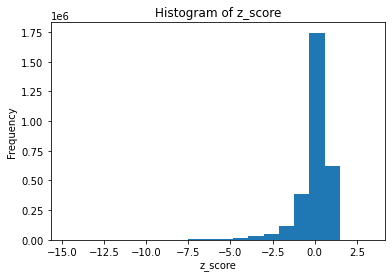

In [10]:
import matplotlib.pyplot as plt

z_scores = school_df['z_score']
plt.hist(z_scores, bins=20)
plt.xlabel('z_score')
plt.ylabel('Frequency')
plt.title('Histogram of z_score')
plt.show()

In [11]:
import pandas as pd
start_time = time.time()

results = client.get_all("833y-fsy8")

print(f"Shooting data frame loaded in {time.time() - start_time:.2f} seconds.")


# Convert to pandas DataFrame
shooting_df = pd.DataFrame.from_records(results)
shooting_df['occur_date']=pd.to_datetime(shooting_df['occur_date'])

print(shooting_df.columns, len(shooting_df))
shooting_df.head()

Shooting data frame loaded in 0.00 seconds.
Index(['incident_key', 'occur_date', 'occur_time', 'boro', 'precinct',
       'jurisdiction_code', 'statistical_murder_flag', 'vic_age_group',
       'vic_sex', 'vic_race', 'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', 'geocoded_column', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',
       'perp_age_group', 'perp_sex', 'perp_race', 'location_desc',
       'loc_of_occur_desc', 'loc_classfctn_desc'],
      dtype='object') 27312


,incident_key,occur_date,occur_time,boro,precinct,jurisdiction_code,statistical_murder_flag,vic_age_group,vic_sex,vic_race,...,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,perp_age_group,perp_sex,perp_race,location_desc,loc_of_occur_desc,loc_classfctn_desc
0,228798151,2021-05-27,21:30:00,QUEENS,105,0,False,18-24,M,BLACK,...,47,63,24018,63,NaN,NaN,NaN,NaN,NaN,NaN
1,137471050,2014-06-27,17:40:00,BRONX,40,0,False,18-24,M,BLACK,...,35,23,10932,49,NaN,NaN,NaN,NaN,NaN,NaN
2,147998800,2015-11-21,03:56:00,QUEENS,108,0,True,25-44,M,WHITE,...,33,66,14787,53,NaN,NaN,NaN,NaN,NaN,NaN
3,146837977,2015-10-09,18:30:00,BRONX,44,0,False,<18,M,WHITE HISPANIC,...,42,27,10930,50,NaN,NaN,NaN,NaN,NaN,NaN
4,58921844,2009-02-19,22:58:00,BRONX,47,0,True,45-64,M,BLACK,...,2,30,11275,29,25-44,M,BLACK,NaN,NaN,NaN


In [12]:
shooting_df.location_desc.value_counts()

MULTI DWELL - PUBLIC HOUS    4832
MULTI DWELL - APT BUILD      2835
(null)                        977
PVT HOUSE                     951
GROCERY/BODEGA                694
BAR/NIGHT CLUB                628
COMMERCIAL BLDG               292
RESTAURANT/DINER              204
NONE                          175
BEAUTY/NAIL SALON             112
FAST FOOD                     104
SOCIAL CLUB/POLICY LOCATI      72
GAS STATION                    71
HOSPITAL                       65
LIQUOR STORE                   41
SMALL MERCHANT                 37
STORE UNCLASSIFIED             36
HOTEL/MOTEL                    35
DRY CLEANER/LAUNDRY            31
SUPERMARKET                    21
DRUG STORE                     14
CLOTHING BOUTIQUE              14
JEWELRY STORE                  12
TELECOMM. STORE                11
VARIETY STORE                  11
SHOE STORE                     10
DEPT STORE                      9
FACTORY/WAREHOUSE               8
VIDEO STORE                     8
CANDY STORE   

In [13]:
public_places=['GROCERY/BODEGA', 'BAR/NIGHT CLUB', 'COMMERCIAL BLDG',
       'RESTAURANT/DINER', 'BEAUTY/NAIL SALON', 'FAST FOOD',
       'SOCIAL CLUB/POLICY LOCATI', 'GAS STATION', 'HOSPITAL', 'LIQUOR STORE',
       'SMALL MERCHANT', 'STORE UNCLASSIFIED', 'HOTEL/MOTEL',
       'DRY CLEANER/LAUNDRY', 'SUPERMARKET', 'DRUG STORE', 'CLOTHING BOUTIQUE',
       'JEWELRY STORE', 'TELECOMM. STORE', 'VARIETY STORE', 'SHOE STORE',
       'DEPT STORE', 'FACTORY/WAREHOUSE', 'VIDEO STORE', 'CANDY STORE',
       'CHAIN STORE', 'GYM/FITNESS FACILITY', 'BANK', 'DOCTOR/DENTIST', 'ATM',
       'SCHOOL', 'LOAN COMPANY', 'PHOTO/COPY STORE', 'CHECK CASH',
       'STORAGE FACILITY']
shooting_df['shooting_in_public']=(shooting_df['location_desc'].isin(public_places))

In [14]:
shooting_df=shooting_df[['incident_key','latitude','longitude','occur_date','shooting_in_public']]
shooting_df['latitude']=shooting_df['latitude'].astype(float)
shooting_df['longitude']=shooting_df['longitude'].astype(float)

In [15]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from geopy.distance import geodesic
from pandas.tseries.offsets import *

school_df_aux=school_df.drop_duplicates(subset='school')
shooting_df.dropna(subset=['latitude','longitude'],inplace=True)
school_df_aux.dropna(subset=['latitude','longitude'],inplace=True)
# create pairwise distance matrix
distances = cdist(shooting_df[['latitude', 'longitude']], school_df_aux[['latitude', 'longitude']])

# find index of minimum distance for each row in df1
min_idx = np.argmin(distances, axis=1)
min_dist = np.min(distances, axis=1)

min_dist_km = [geodesic((shooting_df.iloc[i]['latitude'], shooting_df.iloc[i]['longitude']), (school_df_aux.iloc[min_idx[i]]['latitude'], school_df_aux.iloc[min_idx[i]]['longitude'])).km for i in range(len(shooting_df))]

# add nearest id to df1
shooting_df['nearest_id'] = school_df_aux.iloc[min_idx]['school'].values
shooting_df['distance']=min_dist_km
#shooting_df['latitude_school'] = school_df_aux.iloc[min_idx]['latitude'].values
#shooting_df['longitude_school'] = school_df_aux.iloc[min_idx]['longitude'].values


shooting_df = shooting_df.merge(school_df[['school', 'date', 'z_score','attendance','released']], left_on=['nearest_id', 'occur_date'], right_on=['school', 'date']).drop(['school','date'], axis=1)

from datetime import timedelta
shooting_df['occur_date_plus1']=shooting_df['occur_date']+ BDay(1)
shooting_df = shooting_df.merge(school_df[['school', 'date','z_score','attendance','released']], left_on=['nearest_id', 'occur_date_plus1'], right_on=['school', 'date'],suffixes=(None,'_nextday')).drop(['school','date'], axis=1)
#shooting_df = shooting_df.merge(school_df[['school', 'date','z_score','attendance','released']], left_on=['nearest_id', 'occur_date_plus1'], right_on=['school', 'date'],suffixes=(None,'_nextday')).drop(['school','date','occur_date_plus1','nearest_id'], axis=1)

shooting_df.drop_duplicates(inplace=True)

shooting_df

C:\Users\paulo.gonzalez.isaurralde@sap.com\AppData\Local\Temp\ipykernel_29800\1068995585.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_df_aux.dropna(subset=['latitude','longitude'],inplace=True)


,incident_key,latitude,longitude,occur_date,shooting_in_public,nearest_id,distance,z_score,attendance,released,occur_date_plus1,z_score_nextday,attendance_nextday,released_nextday
0,71662474,40.694264,-73.932809,2010-03-08,False,16K026,0.254299,0.162709,0.922636,0.0,2010-03-09,0.281850,0.939828,0.0
4,78961869,40.884495,-73.905599,2011-05-25,False,10X007,0.381295,0.475492,0.952830,0.0,2011-05-26,0.515179,0.950943,0.0
5,87694905,40.678205,-73.923188,2012-11-14,False,16K040,0.262694,-0.249520,0.858086,0.0,2012-11-15,0.601696,0.973597,0.0
6,34979907,40.887451,-73.847608,2007-10-11,False,11X112,0.460503,0.226772,0.943274,0.0,2007-10-12,0.389386,0.925446,0.0
8,78644238,40.846155,-73.899250,2011-05-09,False,09X058,0.001461,-0.384716,0.856833,0.0,2011-05-10,-0.023511,0.909091,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5872,51559644,40.773882,-73.988070,2008-09-22,False,03M479,0.214154,0.381187,0.944395,0.0,2008-09-23,-0.044470,0.927626,0.0
5873,79299671,40.800671,-73.944356,2011-06-14,False,75M079,0.242480,-0.314850,0.834395,0.0,2011-06-15,-0.700484,0.777070,0.0
5874,81035627,40.838032,-73.867778,2011-10-04,False,12X102,0.153488,0.373269,0.934831,0.0,2011-10-05,0.317734,0.955056,0.0
5875,143641819,40.843440,-73.882535,2015-06-11,False,12X067,0.198087,0.020476,0.887367,0.0,2015-06-12,-0.055118,0.861492,0.0


In [16]:
school_df.z_score.mean(),school_df.attendance.mean()

(-1.265164544300268e-17, 0.8961071926602494)

In [17]:
shooting_df.z_score.mean(),shooting_df.z_score_nextday.mean(),shooting_df.attendance.mean()

(0.05250351089300234, 0.0396161500081155, 0.9012736051889423)

In [18]:
shooting_df[shooting_df.shooting_in_public==True].z_score.mean(),shooting_df[shooting_df.shooting_in_public==True].z_score_nextday.mean(),shooting_df[shooting_df.shooting_in_public==True].attendance.mean()

(0.03678451212559702, 0.01156248352125026, 0.9028232364049603)

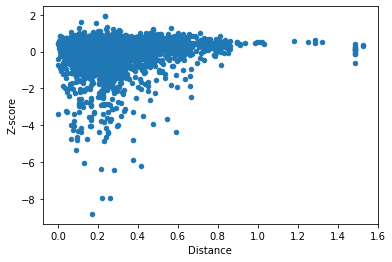

In [19]:
# create a scatter plot of distance vs z_score
shooting_df.plot(kind='scatter', x='distance', y='z_score')

# set the x and y axis labels
plt.xlabel('Distance')
plt.ylabel('Z-score')

# display the plot
plt.show()

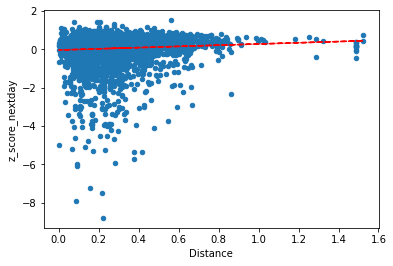

In [20]:
# create a scatter plot of distance vs z_score
shooting_df.plot(kind='scatter', x='distance', y='z_score_nextday')

# calculate the best-fit line using numpy's polyfit function
x = shooting_df['distance']
y = shooting_df['z_score_nextday']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# plot the best-fit line
plt.plot(x,p(x),"r--")

# set the x and y axis labels
plt.xlabel('Distance')
plt.ylabel('z_score_nextday')

# display the plot
plt.show()

In [21]:
school_df=school_df.merge(shooting_df[['nearest_id','occur_date']],left_on=['school','date'],right_on=['nearest_id','occur_date'],how='left')
school_df=school_df.merge(shooting_df[['nearest_id','occur_date_plus1']],left_on=['school','date'],right_on=['nearest_id','occur_date_plus1'],suffixes=(None,'_nextday'),how='left')
school_df['shooting'] = school_df['nearest_id'].notnull()| school_df['nearest_id_nextday'].notnull()
school_df.drop(['nearest_id','occur_date','nearest_id_nextday','occur_date_plus1'],axis=1,inplace=True)

In [22]:
school_df

,school,date,schoolyear,enrolled,present,absent,released,longitude,latitude,month,attendance,mean,std,z_score,shooting
0,01M015,2006-09-05,20062007,252.0,226.0,26.0,0.0,-73.979022,40.721807,9,0.896825,0.862151,0.096213,0.360397,False
1,01M019,2006-09-05,20062007,323.0,290.0,33.0,0.0,-73.983818,40.729636,9,0.897833,0.862151,0.096213,0.370868,False
2,01M020,2006-09-05,20062007,650.0,605.0,45.0,0.0,-73.986648,40.721540,9,0.930769,0.862151,0.096213,0.713197,False
3,01M034,2006-09-05,20062007,376.0,325.0,51.0,0.0,-73.975181,40.726473,9,0.864362,0.862151,0.096213,0.022981,False
4,01M063,2006-09-05,20062007,210.0,193.0,17.0,0.0,-73.986381,40.724117,9,0.919048,0.862151,0.096213,0.591367,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992411,27Q333,2015-09-08,20152016,560.0,559.0,1.0,0.0,-73.786182,40.593967,117,0.998214,0.795203,0.182440,1.112754,False
2992412,07X527,2016-09-07,20162017,492.0,310.0,182.0,0.0,-73.923829,40.822310,129,0.630081,0.630081,NaN,NaN,False
2992413,17K354,2017-04-17,20162017,221.0,107.0,114.0,0.0,-73.936924,40.672713,136,0.484163,0.484163,NaN,NaN,False
2992414,17K354,2017-04-18,20162017,221.0,153.0,68.0,0.0,-73.936924,40.672713,136,0.692308,0.785015,0.131108,-0.707107,False


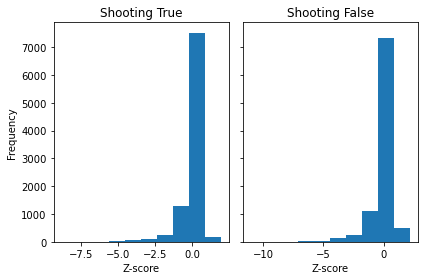

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# create two sub-dataframes for when shooting is true and when it is false
shooting_true = school_df[school_df['shooting'] == True]
shooting_false = school_df[school_df['shooting'] == False]
shooting_false = shooting_false.sample(n=shooting_true.shape[0], random_state=42)


# create a figure with two subplots
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# plot the histograms for z_score when shooting is true and false in the respective subplots
axs[0].hist(shooting_true['z_score'])
axs[1].hist(shooting_false['z_score'])

# set the titles for each subplot
axs[0].set_title('Shooting True')
axs[1].set_title('Shooting False')

# set the x and y axis labels
axs[0].set_xlabel('Z-score')
axs[1].set_xlabel('Z-score')
axs[0].set_ylabel('Frequency')

# display the plot
plt.show()


In [24]:
shooting_true.z_score.mean(),shooting_false.z_score.mean()

(0.04587380372335885, -0.004350946685022976)

In [25]:
shooting_true.z_score.mean(),shooting_false.z_score.mean()

(0.04587380372335885, -0.004350946685022976)

In [26]:
len(shooting_true),len(shooting_false)

(9388, 9388)

## Bike

In [27]:
import pandas as pd
start_time = time.time()

results = client.get_all("833y-fsy8")

print(f"Shooting data frame loaded in {time.time() - start_time:.2f} seconds.")


# Convert to pandas DataFrame
shooting_df = pd.DataFrame.from_records(results)
shooting_df['occur_date']=pd.to_datetime(shooting_df['occur_date'])
shooting_df['occur_time']=pd.to_datetime(shooting_df['occur_time'])


print(shooting_df.columns, len(shooting_df))
shooting_df.head()

Shooting data frame loaded in 0.00 seconds.
Index(['incident_key', 'occur_date', 'occur_time', 'boro', 'precinct',
       'jurisdiction_code', 'statistical_murder_flag', 'vic_age_group',
       'vic_sex', 'vic_race', 'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', 'geocoded_column', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',
       'perp_age_group', 'perp_sex', 'perp_race', 'location_desc',
       'loc_of_occur_desc', 'loc_classfctn_desc'],
      dtype='object') 27312


,incident_key,occur_date,occur_time,boro,precinct,jurisdiction_code,statistical_murder_flag,vic_age_group,vic_sex,vic_race,...,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,perp_age_group,perp_sex,perp_race,location_desc,loc_of_occur_desc,loc_classfctn_desc
0,228798151,2021-05-27,2023-05-03 21:30:00,QUEENS,105,0,False,18-24,M,BLACK,...,47,63,24018,63,NaN,NaN,NaN,NaN,NaN,NaN
1,137471050,2014-06-27,2023-05-03 17:40:00,BRONX,40,0,False,18-24,M,BLACK,...,35,23,10932,49,NaN,NaN,NaN,NaN,NaN,NaN
2,147998800,2015-11-21,2023-05-03 03:56:00,QUEENS,108,0,True,25-44,M,WHITE,...,33,66,14787,53,NaN,NaN,NaN,NaN,NaN,NaN
3,146837977,2015-10-09,2023-05-03 18:30:00,BRONX,44,0,False,<18,M,WHITE HISPANIC,...,42,27,10930,50,NaN,NaN,NaN,NaN,NaN,NaN
4,58921844,2009-02-19,2023-05-03 22:58:00,BRONX,47,0,True,45-64,M,BLACK,...,2,30,11275,29,25-44,M,BLACK,NaN,NaN,NaN


In [28]:
bike_df['date_aux'] = pd.to_datetime(bike_df['date']).dt.date
bike_df['date_aux'] = bike_df['date_aux'].astype('datetime64[ns]')

In [29]:
bike_df['date'] = pd.to_datetime(bike_df['date'])
bike_df['15_min_frame_week']=bike_df['date'].dt.weekday*96+bike_df['date'].dt.hour*4+bike_df['date'].dt.minute/15
grouped_df = bike_df.groupby(['id', '15_min_frame_week'])['counts'].agg(['mean', 'std']).reset_index()
bike_df = pd.merge(bike_df, grouped_df, on=['id', '15_min_frame_week'])
bike_df['z_score_bike'] = (bike_df['counts'] - bike_df['mean']) / bike_df['std']

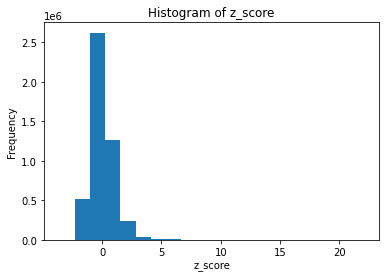

In [30]:
import matplotlib.pyplot as plt

z_scores = bike_df['z_score_bike']
plt.hist(z_scores, bins=20)
plt.xlabel('z_score')
plt.ylabel('Frequency')
plt.title('Histogram of z_score')
plt.show()

In [31]:
import pandas as pd
start_time = time.time()

results = client.get_all("833y-fsy8")

print(f"Shooting data frame loaded in {time.time() - start_time:.2f} seconds.")


# Convert to pandas DataFrame
shooting_df = pd.DataFrame.from_records(results)
shooting_df['occur_date']=pd.to_datetime(shooting_df['occur_date'])
shooting_df['occur_time']=pd.to_datetime(shooting_df['occur_time'])


print(shooting_df.columns, len(shooting_df))
shooting_df.head()

Shooting data frame loaded in 0.00 seconds.
Index(['incident_key', 'occur_date', 'occur_time', 'boro', 'precinct',
       'jurisdiction_code', 'statistical_murder_flag', 'vic_age_group',
       'vic_sex', 'vic_race', 'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', 'geocoded_column', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',
       'perp_age_group', 'perp_sex', 'perp_race', 'location_desc',
       'loc_of_occur_desc', 'loc_classfctn_desc'],
      dtype='object') 27312


,incident_key,occur_date,occur_time,boro,precinct,jurisdiction_code,statistical_murder_flag,vic_age_group,vic_sex,vic_race,...,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,perp_age_group,perp_sex,perp_race,location_desc,loc_of_occur_desc,loc_classfctn_desc
0,228798151,2021-05-27,2023-05-03 21:30:00,QUEENS,105,0,False,18-24,M,BLACK,...,47,63,24018,63,NaN,NaN,NaN,NaN,NaN,NaN
1,137471050,2014-06-27,2023-05-03 17:40:00,BRONX,40,0,False,18-24,M,BLACK,...,35,23,10932,49,NaN,NaN,NaN,NaN,NaN,NaN
2,147998800,2015-11-21,2023-05-03 03:56:00,QUEENS,108,0,True,25-44,M,WHITE,...,33,66,14787,53,NaN,NaN,NaN,NaN,NaN,NaN
3,146837977,2015-10-09,2023-05-03 18:30:00,BRONX,44,0,False,<18,M,WHITE HISPANIC,...,42,27,10930,50,NaN,NaN,NaN,NaN,NaN,NaN
4,58921844,2009-02-19,2023-05-03 22:58:00,BRONX,47,0,True,45-64,M,BLACK,...,2,30,11275,29,25-44,M,BLACK,NaN,NaN,NaN


In [32]:
public_places=['GROCERY/BODEGA', 'BAR/NIGHT CLUB', 'COMMERCIAL BLDG',
       'RESTAURANT/DINER', 'BEAUTY/NAIL SALON', 'FAST FOOD',
       'SOCIAL CLUB/POLICY LOCATI', 'GAS STATION', 'HOSPITAL', 'LIQUOR STORE',
       'SMALL MERCHANT', 'STORE UNCLASSIFIED', 'HOTEL/MOTEL',
       'DRY CLEANER/LAUNDRY', 'SUPERMARKET', 'DRUG STORE', 'CLOTHING BOUTIQUE',
       'JEWELRY STORE', 'TELECOMM. STORE', 'VARIETY STORE', 'SHOE STORE',
       'DEPT STORE', 'FACTORY/WAREHOUSE', 'VIDEO STORE', 'CANDY STORE',
       'CHAIN STORE', 'GYM/FITNESS FACILITY', 'BANK', 'DOCTOR/DENTIST', 'ATM',
       'SCHOOL', 'LOAN COMPANY', 'PHOTO/COPY STORE', 'CHECK CASH',
       'STORAGE FACILITY']
shooting_df['shooting_in_public']=(shooting_df['location_desc'].isin(public_places))

In [33]:
shooting_df=shooting_df[['incident_key','latitude','longitude','occur_date','shooting_in_public','occur_time']]
shooting_df['latitude']=shooting_df['latitude'].astype(float)
shooting_df['longitude']=shooting_df['longitude'].astype(float)

In [34]:
shooting_df['15_min_frame_week'] = round(shooting_df['occur_date'].dt.weekday*96 + shooting_df['occur_time'].dt.hour*4 + shooting_df['occur_time'].dt.minute/15)
shooting_df['15_min_frame_week']=shooting_df['15_min_frame_week'].astype(float)

In [35]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from geopy.distance import geodesic
from pandas.tseries.offsets import *

bike_df_aux=count_location.drop_duplicates(subset='id')
shooting_df.dropna(subset=['latitude','longitude'],inplace=True)
bike_df_aux.dropna(subset=['latitude','longitude'],inplace=True)
# create pairwise distance matrix
distances = cdist(shooting_df[['latitude', 'longitude']], bike_df_aux[['latitude', 'longitude']])

# find index of minimum distance for each row in df1
min_idx = np.argmin(distances, axis=1)
min_dist = np.min(distances, axis=1)

min_dist_km = [geodesic((shooting_df.iloc[i]['latitude'], shooting_df.iloc[i]['longitude']), (bike_df_aux.iloc[min_idx[i]]['latitude'], bike_df_aux.iloc[min_idx[i]]['longitude'])).km for i in range(len(shooting_df))]

# add nearest id to df1
shooting_df['nearest_id'] = bike_df_aux.iloc[min_idx]['id'].values
shooting_df['distance']=min_dist_km
shooting_df_2=shooting_df[shooting_df['distance']<1]

from datetime import timedelta
shooting_df_2['15_min_frame_week_plus1'] = (shooting_df_2['15_min_frame_week'] + 1) % 672

shooting_df_2 = shooting_df_2.merge(bike_df[['id', 'counts', 'z_score_bike','15_min_frame_week','date_aux']], left_on=['nearest_id', '15_min_frame_week','occur_date'], right_on=['id', '15_min_frame_week','date_aux'],how='left',suffixes=(None,'_bike')).drop(['id'], axis=1)
shooting_df_2 = shooting_df_2.merge(bike_df[['id', 'counts', 'z_score_bike','15_min_frame_week','date_aux']], left_on=['nearest_id', '15_min_frame_week_plus1','occur_date'], right_on=['id', '15_min_frame_week','date_aux'],how='left',suffixes=(None,'_next15min')).drop(['id','15_min_frame_week_next15min','15_min_frame_week_plus1','nearest_id','date_aux','date_aux_next15min'], axis=1)
shooting_df_2.drop_duplicates(inplace=True)
shooting_df_2.dropna(subset='counts',inplace=True)
shooting_df_2

C:\Users\paulo.gonzalez.isaurralde@sap.com\AppData\Local\Temp\ipykernel_29800\2813856172.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shooting_df_2['15_min_frame_week_plus1'] = (shooting_df_2['15_min_frame_week'] + 1) % 672


,incident_key,latitude,longitude,occur_date,shooting_in_public,occur_time,15_min_frame_week,distance,counts,z_score_bike,counts_next15min,z_score_bike_next15min
2,140340393,40.695368,-73.983242,2014-12-28,False,2023-05-03 19:53:00,656.0,0.534988,7.0,-1.063472,11.0,-0.769435
11,234208836,40.789310,-73.973838,2021-09-28,False,2023-05-03 20:40:00,179.0,0.206029,23.0,0.286588,15.0,-0.401356
13,199247701,40.755442,-73.943422,2019-07-03,False,2023-05-03 00:04:00,192.0,0.552522,33.0,0.647248,18.0,-0.304049
26,222524733,40.754018,-73.948391,2021-01-01,False,2023-05-03 00:16:00,385.0,0.749199,7.0,-1.203381,17.0,-0.222805
36,199900180,40.754164,-73.944653,2019-07-17,False,2023-05-03 16:38:00,259.0,0.498613,72.0,-0.127245,81.0,0.084448
...,...,...,...,...,...,...,...,...,...,...,...,...
1526,250682059,40.814715,-73.924507,2022-09-06,False,2023-05-03 15:50:00,159.0,0.851666,39.0,-0.253863,36.0,-0.502307
1527,250897909,40.737683,-73.852048,2022-09-10,False,2023-05-03 13:59:00,536.0,0.883342,3.0,-0.272012,5.0,0.424075
1529,248390240,40.755434,-73.943421,2022-07-22,False,2023-05-03 01:43:00,391.0,0.551639,13.0,1.151053,16.0,2.203904
1532,238998457,40.752036,-73.942721,2022-01-11,False,2023-05-03 14:45:00,155.0,0.223092,29.0,-0.696354,28.0,-0.771564


## Borough Population

In [36]:
import pandas as pd
start_time = time.time()

results = client.get_all("833y-fsy8")

print(f"Shooting data frame loaded in {time.time() - start_time:.2f} seconds.")


# Convert to pandas DataFrame
shooting_df = pd.DataFrame.from_records(results)
shooting_df['occur_date']=pd.to_datetime(shooting_df['occur_date'])
shooting_df['occur_time']=pd.to_datetime(shooting_df['occur_time'])


print(shooting_df.columns, len(shooting_df))
shooting_df.head()

Shooting data frame loaded in 0.00 seconds.
Index(['incident_key', 'occur_date', 'occur_time', 'boro', 'precinct',
       'jurisdiction_code', 'statistical_murder_flag', 'vic_age_group',
       'vic_sex', 'vic_race', 'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', 'geocoded_column', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',
       'perp_age_group', 'perp_sex', 'perp_race', 'location_desc',
       'loc_of_occur_desc', 'loc_classfctn_desc'],
      dtype='object') 27312


,incident_key,occur_date,occur_time,boro,precinct,jurisdiction_code,statistical_murder_flag,vic_age_group,vic_sex,vic_race,...,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,perp_age_group,perp_sex,perp_race,location_desc,loc_of_occur_desc,loc_classfctn_desc
0,228798151,2021-05-27,2023-05-03 21:30:00,QUEENS,105,0,False,18-24,M,BLACK,...,47,63,24018,63,NaN,NaN,NaN,NaN,NaN,NaN
1,137471050,2014-06-27,2023-05-03 17:40:00,BRONX,40,0,False,18-24,M,BLACK,...,35,23,10932,49,NaN,NaN,NaN,NaN,NaN,NaN
2,147998800,2015-11-21,2023-05-03 03:56:00,QUEENS,108,0,True,25-44,M,WHITE,...,33,66,14787,53,NaN,NaN,NaN,NaN,NaN,NaN
3,146837977,2015-10-09,2023-05-03 18:30:00,BRONX,44,0,False,<18,M,WHITE HISPANIC,...,42,27,10930,50,NaN,NaN,NaN,NaN,NaN,NaN
4,58921844,2009-02-19,2023-05-03 22:58:00,BRONX,47,0,True,45-64,M,BLACK,...,2,30,11275,29,25-44,M,BLACK,NaN,NaN,NaN


In [37]:
shooting_df=shooting_df[['incident_key','boro']]
shooting_df = pd.merge(shooting_df, bor_population, left_on=['boro'],right_on='borough',how='left')
shooting_df

,incident_key,boro,age_group,borough,_1950,_1950_boro_share_of_nyc_total,_1960,_1960_boro_share_of_nyc_total,_1970,_1970_boro_share_of_nyc_total,...,_2000,_2000_boro_share_of_nyc_total,_2010,_2010_boro_share_of_nyc_total,_2020,_2020_boro_share_of_nyc_total,_2030,_2030_boro_share_of_nyc_total,_2040,_2040_boro_share_of_nyc_total
0,228798151,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,137471050,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,147998800,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,146837977,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58921844,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27307,245029823,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27308,239583450,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27309,246825728,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27310,246876579,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Construction

In [38]:
construction_df['total_est__fee']=construction_df['total_est__fee'].str.replace('$', '').astype(float)

C:\Users\paulo.gonzalez.isaurralde@sap.com\AppData\Local\Temp\ipykernel_29800\2017376694.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  construction_df['total_est__fee']=construction_df['total_est__fee'].str.replace('$', '').astype(float)


In [39]:
import pandas as pd
start_time = time.time()

results = client.get_all("833y-fsy8")

print(f"Shooting data frame loaded in {time.time() - start_time:.2f} seconds.")


# Convert to pandas DataFrame
shooting_df = pd.DataFrame.from_records(results)
shooting_df['occur_date']=pd.to_datetime(shooting_df['occur_date'])
shooting_df['occur_time']=pd.to_datetime(shooting_df['occur_time'])


print(shooting_df.columns, len(shooting_df))
shooting_df.head()

Shooting data frame loaded in 0.00 seconds.
Index(['incident_key', 'occur_date', 'occur_time', 'boro', 'precinct',
       'jurisdiction_code', 'statistical_murder_flag', 'vic_age_group',
       'vic_sex', 'vic_race', 'x_coord_cd', 'y_coord_cd', 'latitude',
       'longitude', 'geocoded_column', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',
       'perp_age_group', 'perp_sex', 'perp_race', 'location_desc',
       'loc_of_occur_desc', 'loc_classfctn_desc'],
      dtype='object') 27312


,incident_key,occur_date,occur_time,boro,precinct,jurisdiction_code,statistical_murder_flag,vic_age_group,vic_sex,vic_race,...,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,perp_age_group,perp_sex,perp_race,location_desc,loc_of_occur_desc,loc_classfctn_desc
0,228798151,2021-05-27,2023-05-03 21:30:00,QUEENS,105,0,False,18-24,M,BLACK,...,47,63,24018,63,NaN,NaN,NaN,NaN,NaN,NaN
1,137471050,2014-06-27,2023-05-03 17:40:00,BRONX,40,0,False,18-24,M,BLACK,...,35,23,10932,49,NaN,NaN,NaN,NaN,NaN,NaN
2,147998800,2015-11-21,2023-05-03 03:56:00,QUEENS,108,0,True,25-44,M,WHITE,...,33,66,14787,53,NaN,NaN,NaN,NaN,NaN,NaN
3,146837977,2015-10-09,2023-05-03 18:30:00,BRONX,44,0,False,<18,M,WHITE HISPANIC,...,42,27,10930,50,NaN,NaN,NaN,NaN,NaN,NaN
4,58921844,2009-02-19,2023-05-03 22:58:00,BRONX,47,0,True,45-64,M,BLACK,...,2,30,11275,29,25-44,M,BLACK,NaN,NaN,NaN


In [98]:
# Taking latitude and longitude as float
shooting_df.latitude=shooting_df.latitude.astype(float)
shooting_df.longitude=shooting_df.longitude.astype(float)
construction_df.gis_latitude=construction_df.gis_latitude.astype(float)
construction_df.gis_longitude=construction_df.gis_longitude.astype(float)

In [99]:
# Define step sizes for latitude and longitude
stepsize_lat = 0.009 # Roughly, 1 kilometer
stepsize_lon = 0.012 # Roughly, 1 kilometer

# Calculate minimum and maximum values for latitude and longitude across both dataframes
latmin = min(shooting_df.latitude.min(), construction_df.gis_latitude.min())
lonmin = min(shooting_df.longitude.min(), construction_df.gis_longitude.min())
lonmax = max(shooting_df.longitude.max(), construction_df.gis_longitude.max())
latmax = max(shooting_df.latitude.max(), construction_df.gis_latitude.max())

# Calculate number of rows and columns in the grid based on the step sizes and range of latitude and longitude
num_rows = int((latmax - latmin) / stepsize_lat) + 1
num_cols = int((lonmax - lonmin) / stepsize_lon) + 1

# Define a function to get the grid number for a given latitude and longitude
def get_grid_number(latitude, longitude, stepsize_lat=stepsize_lat, stepsize_lon=stepsize_lon, latmin=latmin, lonmin=lonmin):
    # Calculate row and column numbers based on the latitude and longitude values
    row = int((latitude - latmin) / stepsize_lat)
    col = int((longitude - lonmin) / stepsize_lon)
    # Calculate the grid number based on the row and column numbers
    grid_number = row * num_cols + col
    return grid_number


In [100]:
# Drop rows with missing latitude and longitude values in dfs
shooting_df.dropna(subset=['latitude', 'longitude'], inplace=True)
construction_df.dropna(subset=['gis_latitude', 'gis_longitude'], inplace=True)

# Map each row in shooting_df and construction_df to a grid cell number using the get_grid_number function
shooting_df['grid_number'] = shooting_df.apply(lambda row: get_grid_number(row['latitude'], row['longitude'], stepsize_lat, stepsize_lon, latmin, lonmin), axis=1)
construction_df['grid_number'] = construction_df.apply(lambda row: get_grid_number(row['gis_latitude'], row['gis_longitude'], stepsize_lat, stepsize_lon, latmin, lonmin), axis=1)


In [101]:
# Remove columns and group by grid_number to get count of incidents in each grid
shooting_df_ = shooting_df[['incident_key', 'grid_number']]
shooting_df_ = shooting_df_.groupby('grid_number').count()['incident_key'].reset_index()

# Merge with original dataframe to add 'boro' column back
shooting_df = shooting_df_.merge(shooting_df[['boro', 'grid_number']], on='grid_number', how='left')

# Rename 'incident_key' column to 'Incident_count'
shooting_df.rename(columns={'incident_key': 'Incident_count'}, inplace=True)

# Group construction_df by grid_number and get sum of 'total_est__fee'
construction_df_total = construction_df[['total_est__fee', 'borough', 'grid_number']].groupby('grid_number').sum()

# Merge shooting_df with construction_df_total on 'grid_number'
shooting_df = pd.merge(shooting_df, construction_df_total, on='grid_number', how='left')


<AxesSubplot:xlabel='Incident_count', ylabel='total_est__fee'>

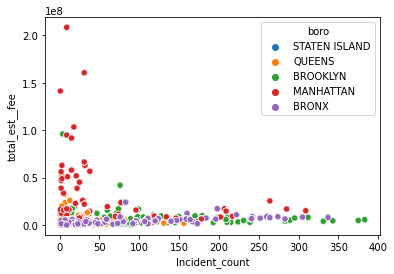

In [102]:
import seaborn as sns

sns.scatterplot(data=shooting_df, x='Incident_count', y='total_est__fee',hue='boro')


We can see that the grid with the most investments are in the places with the least shooting count! Furthermore, we can see that those grid corresponds to either Brooklyn or Manhattan. In adittion, Bronx is usually at the bottom